# 1) Define Problem

# New York Taxi Fare Prediction: 

 our  tasked is  predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. While we can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used . our  challenge is to do better than this using Machine Learning techniques!



# 2) Specify input and output

# Data Field:

1)**ID**
key - Unique string identifying each row in both the training and test sets. Comprised of pickup_datetime plus a unique integer, but this doesn't matter, it should just be used as a unique ID field. Required in your submission CSV. Not necessarily needed in the training set, but could be useful to simulate a 'submission file' while doing cross-validation within the training set.


# Features


**pickup_datetime** - timestamp value indicating when the taxi ride started.


**pickup_longitude** - float for longitude coordinate of where the taxi ride started.


**pickup_latitude** - float for latitude coordinate of where the taxi ride started.


**dropoff_longitude** - float for longitude coordinate of where the taxi ride ended.


**dropoff_latitude** - float for latitude coordinate of where the taxi ride ended.


**passenger_count** - integer indicating the number of passengers in the taxi ride.


# Target


**fare_amount** - float dollar amount of the cost of the taxi ride. This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV.

# 3) Select Framework(libraries)

In [1]:
import os
import numpy as np#linear algebra   
import pandas as pd #data preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train =  pd.read_csv('../input/train.csv', nrows = 100000, parse_dates=["pickup_datetime"])  # 55m rows,but we import 10m rows

In [3]:
test = pd.read_csv('../input/test.csv')   #10k rows 

In [4]:
train.head()  # first 5 record of train 

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


# 4) EDA(Exploratery Data Analysis)

#  Data collection

In [5]:
train.describe() 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


In [6]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
key                  100000 non-null object
fare_amount          100000 non-null float64
pickup_datetime      100000 non-null datetime64[ns]
pickup_longitude     100000 non-null float64
pickup_latitude      100000 non-null float64
dropoff_longitude    100000 non-null float64
dropoff_latitude     100000 non-null float64
passenger_count      100000 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 6.1+ MB


train  has total 8 column in that   5 float64 values, 1 int value , 1 object ,and 1  datetime64 . 

# Data Preprocessing & Data cleaning

In [8]:
print(train.isnull().sum())  # check anu null value is available or not .


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [9]:
print('Old size: %d' % len(train))
train = train.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train))
# if gives 20million data then NaN values comes.

Old size: 100000
New size: 100000


In [10]:
print(train.isnull().sum())


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


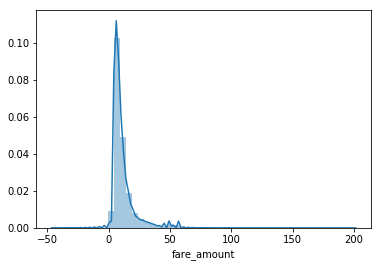

In [11]:
sns.distplot(train['fare_amount']);

in between 0-50 there are 95% 'fare_amount' located.

In [12]:
train.loc[train['fare_amount']<0].shape

(9, 8)

There are 9 records with negative fare, we will remove these record from the data.

there are lots of cases where lat and longitude is 0 , check how many such cases are?

In [13]:
train[(train.pickup_latitude==0) | (train.pickup_longitude)==0 | (train.dropoff_latitude==0) | (train.dropoff_longitude==0)].shape

(1918, 8)

1918 values are** 0 in train.
Based on just look at the data, we can see that its not 100% clean and
some entries will contribute to higher error rates. 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


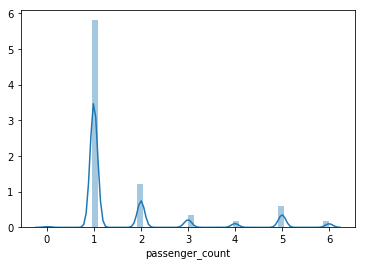

In [14]:
sns.distplot(train['passenger_count'])

In [15]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


In [16]:
#clean up the train dataset to eliminate out of range values
train = train[train['fare_amount'] > 0]
train = train[train['pickup_longitude'] < -72]
train = train[(train['pickup_latitude'] > 40) &(train
                                               ['pickup_latitude'] < 44)]
train = train[train['dropoff_longitude'] < -72]
train = train[(train['dropoff_latitude'] >40) & (train
                                                ['dropoff_latitude'] < 44)]
train = train[(train['passenger_count']>0) &(train['passenger_count'] < 10)]

Now we can see there are no obvious inconstitencies with the data.

In [17]:
 train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,97532.000000,97532.000000,97532.000000,97532.000000,97532.000000,97532.000000
mean,11.353151,-73.981994,40.751212,-73.974020,40.751592,1.680495
std,9.697156,2.122039,0.033016,0.039668,0.035153,1.298620
min,0.010000,-736.550000,40.121653,-75.354559,40.164927,1.000000
25%,6.000000,-73.992268,40.736653,-73.991397,40.735770,1.000000
50%,8.500000,-73.982077,40.753536,-73.980438,40.753965,1.000000
75%,12.500000,-73.968291,40.767685,-73.965135,40.768478,2.000000
max,200.000000,-72.856968,43.183332,-72.854940,43.415190,6.000000


#  Same operation perform on 'test'

In [18]:
test.head()  # first 5 record of test 

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [19]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 542.2+ KB


In [21]:
print(test.isnull().sum())

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [22]:
test[(test.pickup_latitude==0) | (test.pickup_longitude)==0 | (test.dropoff_latitude==0) | (test.dropoff_longitude==0)].shape


(0, 7)

In [23]:
print(test.isnull().sum())


key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [24]:
print('Old size: %d' % len(test))
test = test.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(test))

Old size: 9914
New size: 9914


In [25]:
#clean up the train dataset to eliminate out of range values
test = test[test['pickup_longitude'] < -72]
test = test[(test['pickup_latitude'] > 40) &(train
                                               ['pickup_latitude'] < 44)]
test = test[test['dropoff_longitude'] < -72]
test = test[(test['dropoff_latitude'] >40) & (train
                                                ['dropoff_latitude'] < 44)]
test = test[(test['passenger_count']>0) &(train['passenger_count'] < 10)]
train.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


we clean the dataset.

#  Transforming Feature

In [26]:
#pickup_datetime 

train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
type(train['pickup_datetime'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

conver Datetime var into single column as year, month,day_of_week, and hour 

In [27]:
combine = [test, train]
for dataset in combine:
        # Features: hour of day (night vs day), month (some months may be in higher demand) 
    dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'])
    dataset['hour_of_day'] = dataset.pickup_datetime.dt.hour
    dataset['day'] = dataset.pickup_datetime.dt.day
    dataset['week'] = dataset.pickup_datetime.dt.week
    dataset['month'] = dataset.pickup_datetime.dt.month
    dataset['day_of_year'] = dataset.pickup_datetime.dt.dayofyear
    dataset['week_of_year'] = dataset.pickup_datetime.dt.weekofyear

    
#dataset['Year'] = dataset['pickup_datetime'].apply(lambda time: time.year)
#dataset['Month'] = dataset['pickup_datetime'].apply(lambda time: time.month)
#ataset['Day of Week'] = dataset['pickup_datetime'].apply(lambda time: time.dayofweek)
#dataset['Hour'] = dataset['pickup_datetime'].apply(lambda time: time.hour)

train.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day,week,month,day_of_year,week_of_year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,15,25,6,166,25
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,1,5,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,33,8,230,33
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,21,16,4,112,16
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,10,3,68,10


In [28]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day,week,month,day_of_year,week_of_year
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,13,27,5,1,27,5
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,13,27,5,1,27,5
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,11,8,40,10,281,40
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,21,1,48,12,336,48
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,21,1,48,12,336,48


In [29]:
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the "Manhattan vector" from
# the pickup location to the dropoff location.
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train) 
train.head(1)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day,week,month,day_of_year,week_of_year,abs_diff_longitude,abs_diff_latitude
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.84161,40.712278,1,17,15,25,6,166,25,0.002701,0.009041


In [30]:
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the "Manhattan vector" from
# the pickup location to the dropoff location.
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(test) 
test.head(1)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day,week,month,day_of_year,week_of_year,abs_diff_longitude,abs_diff_latitude
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.97332,40.763805,-73.98143,40.743835,1,13,27,5,1,27,5,0.00811,0.01997


In [31]:
# remove unnessary column that not requred for modeling.
train = train.drop(['key','pickup_datetime'],axis = 1) 
test = test.drop('pickup_datetime',axis = 1)
#train.info()

#  Feature encoding

In [32]:
x_train = train.drop(['fare_amount'], axis=1)
y_train = train['fare_amount']
x_test = test.drop('key', axis=1)


#  5) Model Design

#  i)Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [34]:
linmodel = LinearRegression()
linmodel.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
linmodel_pred = linmodel.predict(x_test)  # prediction on train 


# ii)Random Forest Regressor


In [36]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


references
https://www.kaggle.com/danpavlov/ny-taxi-fare-comprehensive-and-simple-analysis

# iii) XG-BOOST Model


Now that we have the dataFrame that we wanted we can start to train the XGBoost model. First we will split the dataset into train(99%) and test(1%). with this amont of data 1% should be enough to test performance.

In [37]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

#Let's prepare the test set
x_pred = test.drop('key', axis=1)


In [38]:
#feature selection
y = train['fare_amount']    
train_df = train.drop(['fare_amount'],axis = 1)

In [39]:

# Let's run XGBoost and predict those fares
x_train,x_test,y_train,y_test = train_test_split(train_df,y,random_state=123,test_size=0.2)


# Parameter Tunning(selecting best parameter for model)


In [40]:
params = {
      #parameters that we are going to tune
    'max_depth' :8 ,#result of tuning with cv
    'eta' :.03, #result of tuning with cv
    'subsample' : 1, # result of tuning with cv
    'colsample_bytree' : 0.8, #result of tuning with cv
    #other parameter
    'objective': 'reg:linear',
    'eval_metrics':'rmse',
    'silent': 1
}

In [41]:
#Block of code used for hypertuning parameters. Adapt to each round of parameter tuning.
CV=False
if CV:
    dtrain = xgb.DMatrix(train,label=y)
    gridsearch_params = [
        (eta)
        for eta in np.arange(.04, 0.12, .02)
    ]

    # Define initial best params and RMSE
    min_rmse = float("Inf")
    best_params = None
    for (eta) in gridsearch_params:
        print("CV with eta={} ".format(
                                 eta))

        # Update our parameters
        params['eta'] = eta

        # Run CV
        cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=1000,
            nfold=3,
            metrics={'rmse'},
            early_stopping_rounds=10
        )

        # Update best RMSE
        mean_rmse = cv_results['test-rmse-mean'].min()
        boost_rounds = cv_results['test-rmse-mean'].argmin()
        print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
        if mean_rmse < min_rmse:
            min_rmse = mean_rmse
            best_params = (eta)

    print("Best params: {}, RMSE: {}".format(best_params, min_rmse))
else:
    #Print final params to use for the model
    params['silent'] = 0 #Turn on output
    print(params)

{'max_depth': 8, 'eta': 0.03, 'subsample': 1, 'colsample_bytree': 0.8, 'objective': 'reg:linear', 'eval_metrics': 'rmse', 'silent': 0}


In [42]:

def XGBmodel(x_train,x_test,y_train,y_test):
    matrix_train = xgb.DMatrix(x_train,label=y_train)
    matrix_test = xgb.DMatrix(x_test,label=y_test)
    model=xgb.train(params=params
                                  ,dtrain=matrix_train,num_boost_round=200, 
                    early_stopping_rounds=20,evals=[(matrix_test,'test')],)
    return model

model=XGBmodel(x_train,x_test,y_train,y_test)
xgb_pred = model.predict(xgb.DMatrix(x_pred), ntree_limit = model.best_ntree_limit)

[0]	test-rmse:14.2722
Will train until test-rmse hasn't improved in 20 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[1]	test-rmse:13.9389
[2]	test-rmse:13.5774
[3]	test-rmse:13.2195
[4]	test-rmse:12.8726
[5]	test-rmse:12.5378
[6]	test-rmse:12.2231
[7]	test-rmse:11.9134
[8]	test-rmse:11.6131
[9]	test-rmse:11.3209
[10]	test-rmse:11.0427
[11]	test-rmse:10.7738
[12]	test-rmse:10.5113
[13]	test-rmse:10.2575
[14]	test-rmse:10.0155
[15]	test-rmse:9.77837
[16]	test-rmse:9.55056
[17]	test-rmse:9.33292
[18]	test-rmse:9.12045
[19]	test-rmse:8.91649
[20]	test-rmse:8.72218
[21]	test-rmse:8.53597
[22]	test-rmse:8.35893
[23]	test-rmse:8.18723
[24]	test-rmse:8.03427
[25]	test-rmse:7.88696
[26]	test-rmse:7.73974
[27]	test-rmse:7.5931
[28]	test-rmse:7.44741
[29]	test-rmse:7.31207
[30]	test-rmse:7.17888
[31]	test-rmse:7.05187
[32]	test-rmse:6.92745
[33]	test-rmse:6.80708
[34]	test-rmse:6.69603
[35]	test-rmse:6.59028
[36]	test-rmse:6.48986
[37]	test-rmse:6.39503
[38]	test-rmse:6.29739
[39]	test-rmse:6.20833
[40]	test-rmse:6.1185
[41]	test-rmse:6.03799
[42]	test-rmse:5.95492
[43]	test-rmse:5.87961
[44]	test-rmse:5.80432

In [43]:
linmodel_pred, rfr_pred, xgb_pred


(array([ 9.49426799, 10.67425794,  7.40927216, ..., 36.33002266,
        18.47096884,  6.85437437]),
 array([ 8.15 ,  9.44 ,  3.88 , ..., 47.532, 18.43 ,  6.19 ]),
 array([ 8.869515,  8.721818,  5.247205, ..., 49.612556, 18.333788,
         6.9378  ], dtype=float32))

In [44]:
# Assigning weights. More precise models gets higher weight.
linmodel_weight = 1
rfr_weight = 1
xgb_weight = 3
prediction = (linmodel_pred * linmodel_weight + rfr_pred * rfr_weight + xgb_pred * xgb_weight) / (linmodel_weight + rfr_weight + xgb_weight)


In [45]:
prediction


array([ 8.85056304,  9.25594256,  5.4061773 , ..., 46.53993993,
       18.3804669 ,  6.77155493])

# 6)Submission


In [46]:
# Add to submission
submission = pd.DataFrame({
        "key": test['key'],
        "fare_amount": prediction.round(2)
})

submission.to_csv('sub_fare.csv',index=False)


In [47]:
submission

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.85
1,2015-01-27 13:08:24.0000003,9.26
2,2011-10-08 11:53:44.0000002,5.41
3,2012-12-01 21:12:12.0000002,7.90
4,2012-12-01 21:12:12.0000003,14.47
5,2012-12-01 21:12:12.0000005,10.55
6,2011-10-06 12:10:20.0000001,6.29
7,2011-10-06 12:10:20.0000003,54.09
8,2011-10-06 12:10:20.0000002,12.62
9,2014-02-18 15:22:20.0000002,6.23


# 7)Conclusion

i have tried all the parts related to the proccess of machin learning with a variety of python package and i know there are still some problem then i hope to get your feedback to improve it.